### Load in required packages

In [4]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

In [95]:
# Import CSV with renamed columns
df = pd.read_csv("bike_data.csv")

    
# Clean up some columns
# df.info()
# df.describe()
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit = 'h')

# Similar to is_holiday, map is_functioning to True and False

df['is_holiday'] = df['is_holiday'].map({'No Holiday':False,'Holiday':True})
#or
#df['is_holiday'] = df['is_holiday'].replace({'No Holiday':False,'Holiday':True}).astype(bool)

df['is_functioning'] = df['is_functioning'].map({'No':False,'Yes':True})


## Only keep observations where the system is functioning

#usual method
#df = df[df['is_functioning'] ==  True]

#using query
df.query('is_functioning')

# Print out the result
df.shape


(8760, 15)

### Visualize bike rentals over time

/home/kyle/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



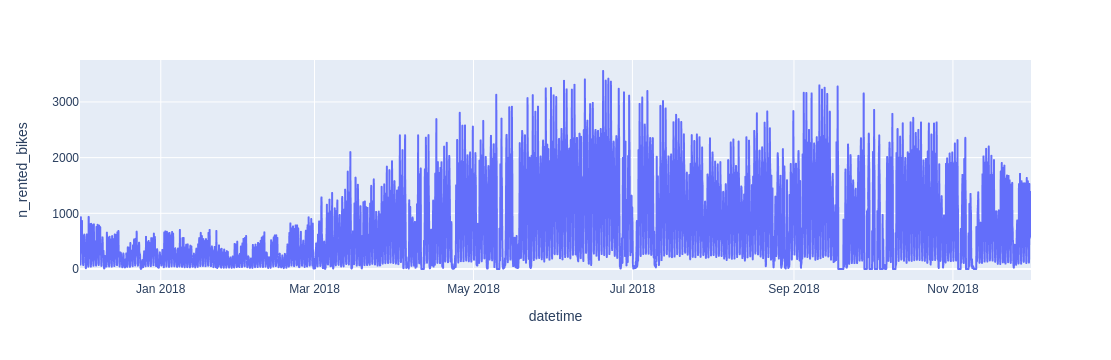

In [115]:
# Create a line plot of rented bikes over time


px.line(df,x="datetime",y="n_rented_bikes")




/home/kyle/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



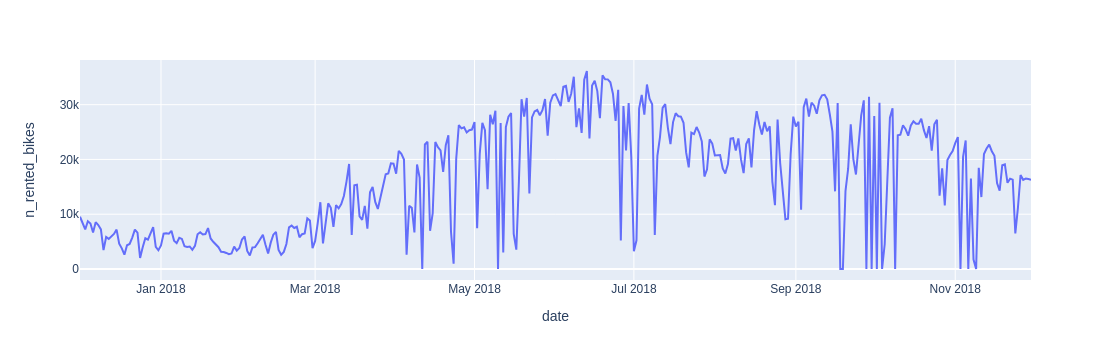

In [135]:
# Calculate the total number of rented bikes per day
df_day = df.groupby('date', as_index=False)['n_rented_bikes'].sum()
df_day
# Create a line plot showing total number of bikes per day over time

px.line(df_day, x = 'date', y = 'n_rented_bikes')


/home/kyle/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



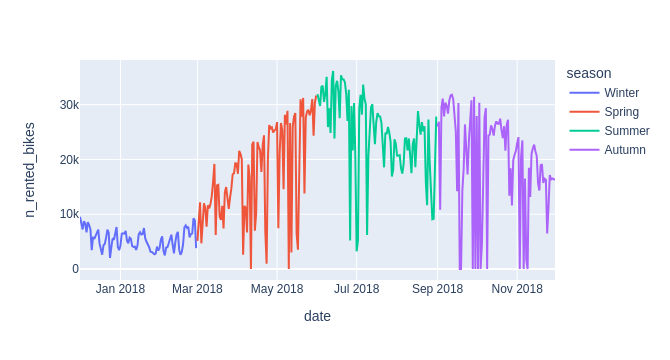

In [334]:
# Copy the previous chain of manipulations and add season as a variable to group by
by_day_season = df.groupby(['date', 'season'], as_index=False).agg({'n_rented_bikes': 'sum'})

# Copy the code for the previous line plot and map season to color
px.line(by_day_season, x = 'date', y = 'n_rented_bikes', color='season')

/home/kyle/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



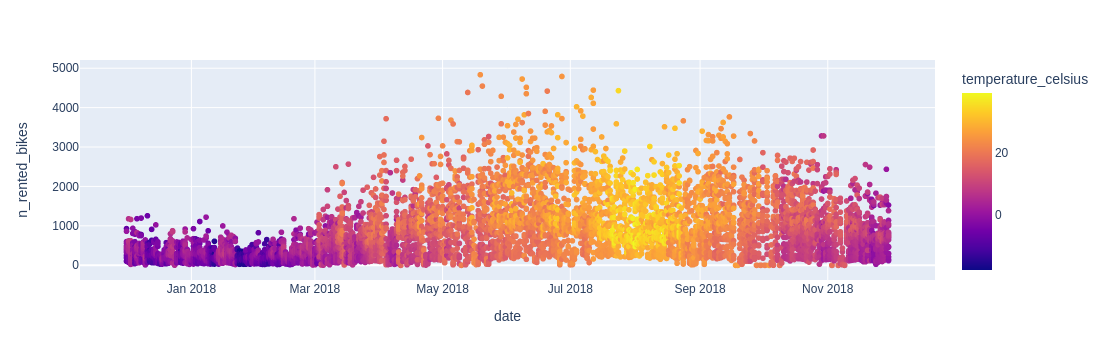

In [197]:
# Copy the previous chain of manipulations and add season as a variable to group by
by_day_temp = df.groupby(['date', 'season','temperature_celsius'], as_index=False).agg({'n_rented_bikes': 'sum'})

# Copy the code for the previous line plot and map season to color
px.scatter(by_day_temp, x = 'date', y = 'n_rented_bikes', color='temperature_celsius')

### Explore the relation between weather and rentals

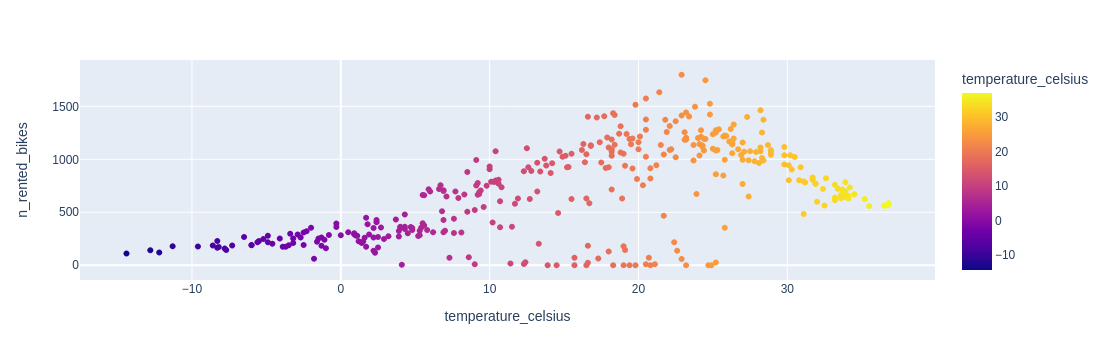

In [237]:
# Query df to only keep observations at noon
noon_rides = df.query('hour == 12')
# Create a scatter plot showing temperature against number of rented bikes

px.scatter(noon_rides, x = 'temperature_celsius', y = 'n_rented_bikes', color='temperature_celsius' )

# Add a trendline if you feel like it


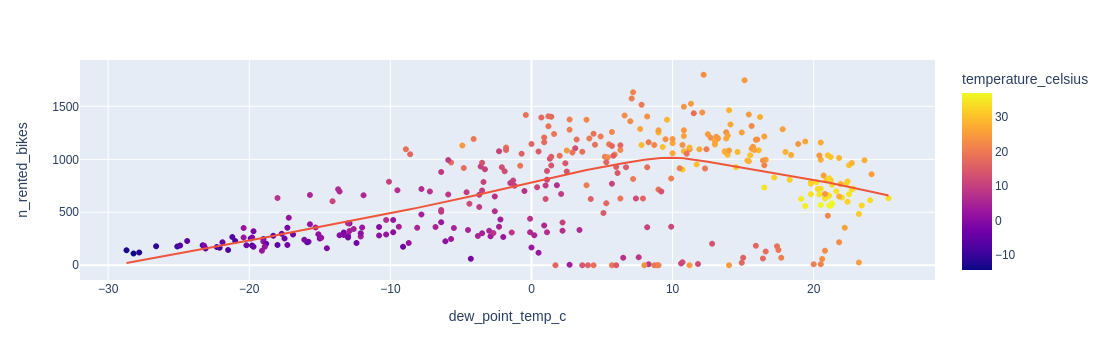

In [235]:
# Copy and update the code for the previous scatter plot 
px.scatter(noon_rides, x = 'dew_point_temp_c', y = 'n_rented_bikes' , color='temperature_celsius', trendline = 'lowess')
# to investigate relation with other weather parameters


### Explore typical daily usage pattern

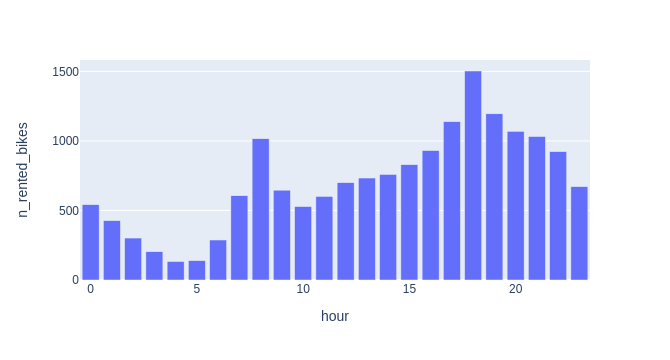

In [315]:
# Calculate the average number of rented bikes per hour
by_hour = df.groupby('hour', as_index=False).agg({'n_rented_bikes':'mean'})

# Create a bar chart showing the usage pattern
px.bar(by_hour, x = 'hour', y = 'n_rented_bikes')

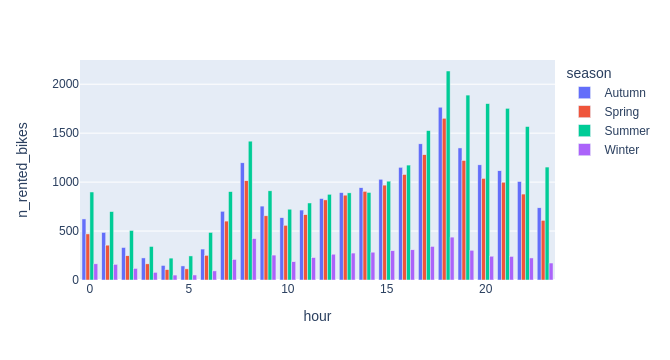

In [321]:
# Copy and adapt the previous query to take into account the season
by_hour_season = df.groupby(['hour', 'season'], as_index=False).agg({'n_rented_bikes':'mean'})

# Copy and adapt the code for the previous bar chart to show usage pattern per season
px.bar(by_hour_season, x = 'hour', y = 'n_rented_bikes', color='season',barmode= 'group')


### Extra: is New Year's Eve different?

/home/kyle/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



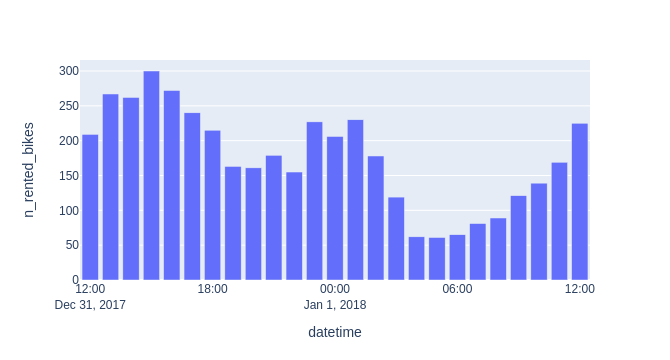

In [299]:
# New Years dates
new_year_start = datetime(2017,12,31,12)
new_year_end = datetime(2018,1,1, 12)

new_year = df.query("@new_year_start <= datetime <= @new_year_end") 
# Create data frame with new year's data

px.bar(new_year,x = 'datetime', y = 'n_rented_bikes')
# Show usage pattern
